In [1]:
import tensorflow as tf
import from_scratch as fs
import matplotlib.pyplot as plt
import numpy as np


mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = np.divide(X_train, 255.0), np.divide(X_test , 255.0)

In [2]:
model = fs.models.Sequential([
    fs.layers.Flatten(input_shape=(28,28,)),
    fs.layers.Dense(300, activation='relu'),
    fs.layers.Dense(100, activation='relu'),
    fs.layers.Dense(10, activation='softmax')
])

model.compile(
    loss = fs.losses.sparse_crossentropy(),
    optimizer = fs.optimizers.sgd(lr=1e-3)
)

print(model.summary())

Name                  Input Shape     Output Shape      Nb Parameters
--------------------  --------------  --------------  ---------------
Flatten               (None, 28, 28)  (None, 784)
Dense                 (None, 784)     (None, 300)              235500
Activation (relu)
Dense                 (None, 300)     (None, 100)               30100
Activation (relu)
Dense                 (None, 100)     (None, 10)                 1010
Activation (softmax)

Total parameters : 266610



In [4]:
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50 : batch 938/Unknown : loss 2.067E-02
Epoch 2/50 : batch 938/938 : loss 1.681E-02
Epoch 3/50 : batch 938/938 : loss 1.394E-02
Epoch 4/50 : batch 938/938 : loss 1.174E-02
Epoch 5/50 : batch 938/938 : loss 9.988E-03
Epoch 6/50 : batch 938/938 : loss 8.544E-03
Epoch 7/50 : batch 938/938 : loss 7.335E-03
Epoch 8/50 : batch 938/938 : loss 6.312E-03
Epoch 9/50 : batch 938/938 : loss 5.442E-03
Epoch 10/50 : batch 938/938 : loss 4.691E-03
Epoch 11/50 : batch 938/938 : loss 4.042E-03
Epoch 12/50 : batch 938/938 : loss 3.480E-03
Epoch 13/50 : batch 938/938 : loss 3.003E-03
Epoch 14/50 : batch 938/938 : loss 2.593E-03
Epoch 15/50 : batch 938/938 : loss 2.243E-03
Epoch 16/50 : batch 938/938 : loss 1.954E-03
Epoch 17/50 : batch 938/938 : loss 1.705E-03
Epoch 18/50 : batch 938/938 : loss 1.495E-03
Epoch 19/50 : batch 938/938 : loss 1.324E-03
Epoch 20/50 : batch 938/938 : loss 1.177E-03
Epoch 21/50 : batch 938/938 : loss 1.049E-03
Epoch 22/50 : batch 938/938 : loss 9.367E-04
Epoch 23/50 : b

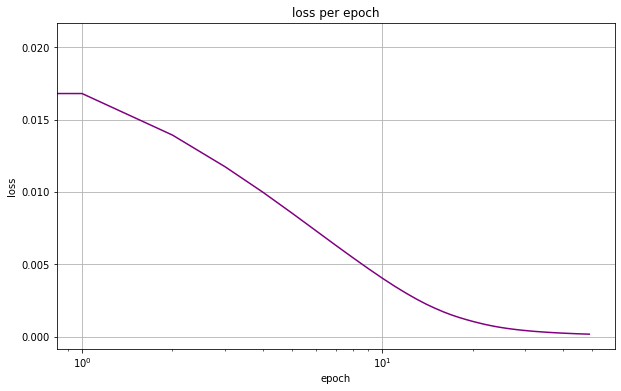

In [6]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title('loss per epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.semilogx(history['epochs'], history['loss'], color='purple')
plt.show()

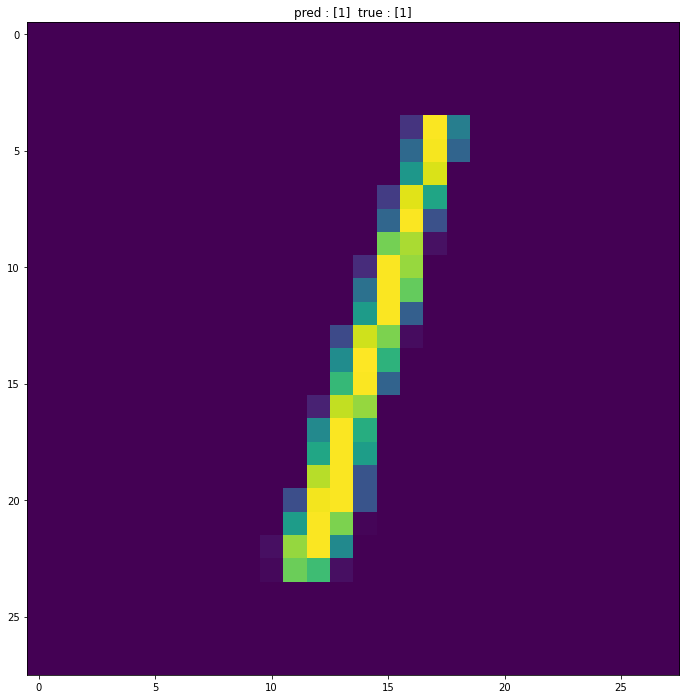

In [8]:
idx = 2

img = X_test[idx]
pred = np.argmax(model.forward(X_test[idx:idx+1]), axis=-1)
plt.figure(figsize=(15,12))
plt.title(f'pred : {str(pred)}  true : {str([y_test[idx]])}')
plt.imshow(img)
plt.show()

In [9]:
y_pred = model.forward(X_test)

y_idx = np.argmax(y_pred, axis=-1)
mask = np.equal(y_test, y_idx)
accuracy = sum(mask)/len(mask)

print(f'Accuracy on the test set : {accuracy}')

Accuracy on the test set : 0.9812
